In [41]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import platform
from time import sleep
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import seaborn as sns
import requests

from bs4 import BeautifulSoup as bs

In [26]:
font_location = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [27]:
def recommend_stock(self):
    addr = "https://finance.naver.com/" + "sise/sise_quant.nhn"
    html = urllib.request.urlopen(addr).read()
    soup = BeautifulSoup(html, "html.parser")
    box = soup.find_all("div", {"class": "box_type_l"})
    trs = soup.find_all("tr")
    for idx, tr in enumerate(trs):
        if idx > 6:
            tds = tr.find_all('a')

            if tds != []:
                code = str(re.findall('[0-9]+', str(tds))[0])
                    # print(re.findall('[0-9]+',str(tds))[0])
                self.top100_trading.append(code)

def recommend_stock(self):
    addr = "https://finance.naver.com/" + "sise/sise_quant.nhn"
    html = urllib.request.urlopen(addr).read()
    soup = BeautifulSoup(html, "html.parser")
    box = soup.find_all("div", {"class": "box_type_l"})
    trs = soup.find_all("tr")
    for idx, tr in enumerate(trs):
        if idx > 6:
            tds = tr.find_all('a')

            if tds != []:
                code = str(re.findall('[0-9]+', str(tds))[0])
                    # print(re.findall('[0-9]+',str(tds))[0])
                self.top100_trading.append(code)

def env_bit(self):
    print(platform.architecture())
def stock_inform_load(self):
    self.stock_inform_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
    # 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
    self.stock_inform_df.종목코드 = self.stock_inform_df.종목코드.map('{:06d}'.format)
    # 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
    self.stock_inform_df = self.stock_inform_df[['회사명', '종목코드']]
    # 한글로된 컬럼명을 영어로 바꿔준다.
    self.stock_inform_df = self.stock_inform_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
def get_target(self):
    for code,name in zip(self.stock_inform_df.code,self.stock_inform_df.name):
        df = code_load(code)
        #    if len(df) > 17 and df.close[1] != 0 and df.volume.mean() != 0 and df.close[1] !=0:
        #        features = [df.close.diff()[1] / df.close[1] * 100, (df.volume[1] - df.volume.mean()) / df.volume.mean() * 100, (df.high[1] - df.low[1]) / df.close[1] * 100,name]
                # sleep(0.3)
        #        data = pd.DataFrame([features])
        #        self.stock_value.append(data)
        #    else:
        #        pass
        if len(df) > 17:
            if df.close[1] > df.close[2] and df.close[2] > df.close[3] and df.volume[1] > df.volume[2] and \
            df['close'][1] > df['close'].rolling(5).mean()[1] and \
            sum(df.volume.diff()[len(df) - 5:len(df)]) > df.volume.mean() * 1 / 2 and df.volume[1] > df.volume.mean() * 1.2 and df.iloc[:, [1, 6]].corr().iloc[0, 1] > 0.88:
                print("%s : %s원 등락: %s C: %s" % (get_code_name(self.stock_inform_df, code), df.close[1],(df.close[1] - df.close[2]) / df.close[2] * 100,df.iloc[:, [1, 6]].corr().iloc[0, 1]))
        else:
            pass
        #plt.show()
        #self.plot_temp.scatter3D(self.stock_value.iloc[:, 2], self.stock_value.iloc[:, 1], self.stock_value.iloc[:, 0])
        #for i in range(self.stock_value):
        #   self.plot_temp.text(self.stock_value.iloc[i, 2], self.stock_value.iloc[i, 1], self.stock_value.iloc[i, 0], str(self.stock_value.iloc[i,3]))


#sum(df['close'][1:6] > df['close'].rolling(5).mean()[1:6]) == 5 and \
def get_code_name(stock_infrom_df,code):
    code_nm = stock_infrom_df.query("code=='{0}'".format(code))['name'].to_string(index=False)
    return str(code_nm)

def get_name_code(stock_inform_df,name):
    name_cd = stock_inform_df.query("name=='{0}'".format(name))['code'].to_string(index=False)
    return str(name_cd)

def get_code_url(code):
    url = "http://finance.naver.com/item/sise_day.nhn?code="+str(code)
    return url

def code_load(code):
    url = get_code_url(code)
    df = pd.DataFrame()
    #print(code)
    for page in range(1, 30):
        pg_url = url + '&page=' + str(page)
        #print(pg_url)
        df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    df = df.dropna()
    df = df.rename(columns={'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'})
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int)
    df['date'] = pd.to_datetime(df['date'])
    df.reset_index(drop=True)
    df = df.sort_values(by=['date'], ascending=True)
    return df


In [28]:


stock_inform_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
stock_inform_df.종목코드 = stock_inform_df.종목코드.map('{:06d}'.format)
# 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
stock_inform_df = stock_inform_df[['회사명', '종목코드']]
# 한글로된 컬럼명을 영어로 바꿔준다.
stock_inform_df = stock_inform_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


In [29]:
def stock_information(code):
    
    addr = 'https://finance.naver.com/item/main.nhn?code='+str(code)
    data = pd.read_html(addr,encoding='euc-kr')
    ans = 2
    for i in range(6):
        if '시가총액' == data[i].iloc[0,0]:
            ans = i
    
    return data[ans]

In [30]:
# 단위 변환
def cast_int(temp):
    
    temp = temp.iloc[0,1]
    unit1 = re.compile('(.+)조')
    unit2 = re.compile('.*?억원')
    num = re.compile('[:0-9:]+')
    num.findall(unit2.findall(temp)[0])
    u1 = 0
    u2 = 0
    if '조' in temp:
        unit2 = re.compile('[:조].*?억원')
        u1 =  num.findall(unit1.findall(temp)[0])
        u1 = int(''.join(u1))

    if '억' in temp:
        u2 =  num.findall(unit2.findall(temp)[0])
        u2 = int(''.join(u2))
    
    value = u1 * 10000 + u2 
    
    return value

In [31]:
def get_market_cap(event):
    data=[]
    for i in range(len(event)):
        value = stock_information(event.code[i])
        value = cast_int(value)
        temp = {'name':event.name[i],'Market_cap':value}
        data.append(temp)
    return pd.DataFrame(data)

In [32]:
# road_event : 종목별 이름 코드 불러오기  보험=190 생명보험= 192
def road_event(number):
    addr = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no='+str(number)
    event = pd.read_html(addr,header=0,encoding='euc-kr')[2]
    event = event['종목명'].dropna()
    data=[]
    for i in event:
        name=i
        code=get_name_code(stock_inform_df,str(name))
        if code=='Series([], )':
            continue
        else:
            temp={'name': name, 'code': code.split()[0]}
            data.append(temp)
    data=pd.DataFrame(data,columns=['name','code'])
    return data

In [78]:
# 업종 불러오기

def road_upjong_code():
    addr_html = 'https://finance.naver.com/sise/sise_group.naver?type=upjong'
    event = pd.read_html(addr_html,header=0,encoding='euc-kr')[0]
    page = requests.get(addr_html)
    soup = bs(page.text, "html.parser")
    elements = soup.select('td > a[href]')

    idx = [1 if 'sise' in str(e) else 0 for e in elements]
    data = [str(e)  for o, e in  zip(idx, elements) if o==1]

    up_dict = {f"{i.split('>')[-2].split('<')[-2]}":int(i.split('no=')[-1].split('\"')[-2]) for i in data}
    
    return up_dict

In [79]:
def get_key(val,info):
    for key, value in info.items():
         if val == value:
             return key

In [83]:
def Market_pie(number,info):
    data = road_event(number)
    data = get_market_cap(data)
    data['labels'] = [f'{nm}({mk_value})' for nm, mk_value in zip(data['name'],data['Market_cap'])]
    colors = sns.color_palette('pastel')[0:len(data)]
    print(data)
    plt.rc('font', size=15)
    plt.figure(figsize=(10,10))
    plt.pie(data.Market_cap,labels=data.labels,colors=colors,autopct='%.1f%%',)
    plt.title(f'NAVER Finance KOSPI Market Pie Chart (단위: 억) TM : {get_key(number,info)}')
    plt.show()


In [66]:
info = road_upjong_code()

In [54]:
print(info)

{'식품과기본식료품소매': 302, '담배': 275, '다각화된통신서비스': 336, '식품': 268, '부동산': 280, '운송인프라': 296, '가스유틸리티': 312, '무선통신서비스': 333, '손해보험': 315, '우주항공과국방': 284, '복합유틸리티': 331, '판매업체': 265, '카드': 337, '전기제품': 283, '기타': 25, '석유와가스': 313, '화장품': 266, '생명보험': 330, '기타금융': 319, '반도체와반도체장비': 278, '광고': 310, '상업서비스와공급품': 324, '무역회사와판매업체': 334, '종이와목재': 318, '복합기업': 276, '전자장비와기기': 282, '비철금속': 322, '백화점과일반상점': 264, '사무용전자제품': 338, '화학': 272, '전기유틸리티': 325, '조선': 291, '제약': 261, '항공사': 305, '증권': 321, '음료': 309, '핸드셋': 292, '해운사': 323, '가정용기기와용품': 298, '호텔,레스토랑,레저': 317, '포장재': 311, '도로와철도운송': 329, '자동차부품': 270, '항공화물운송과물류': 326, '은행': 301, '인터넷과카탈로그소매': 308, '기계': 299, '디스플레이패널': 327, '섬유,의류,신발,호화품': 274, '건축자재': 289, '철강': 304, '가정용품': 297, '컴퓨터와주변기기': 293, '가구': 303, '건설': 279, '전기장비': 306, '에너지장비및서비스': 295, '교육서비스': 290, '자동차': 273, '건강관리장비와용품': 281, '창업투자': 277, '생물공학': 286, '게임엔터테인먼트': 263, '양방향미디어와서비스': 300, '디스플레이장비및부품': 269, '전문소매': 328, '전자제품': 307, '소프트웨어': 287, '레저용장비와제품': 271, '통신장비': 294, '문구류

       name  Market_cap           labels
0        DB        1762         DB(1762)
1   삼성에스디에스      105621  삼성에스디에스(105621)
2    롯데정보통신        4196     롯데정보통신(4196)
3     콤텍시스템        1060      콤텍시스템(1060)
4    토마토시스템         429      토마토시스템(429)
5   아시아나IDT        1793    아시아나IDT(1793)
6       라피치         380         라피치(380)
7    미래아이앤지         474      미래아이앤지(474)
8    현대오토에버       31812    현대오토에버(31812)
9       유엔젤         506         유엔젤(506)
10    카카오페이      101242    카카오페이(101242)


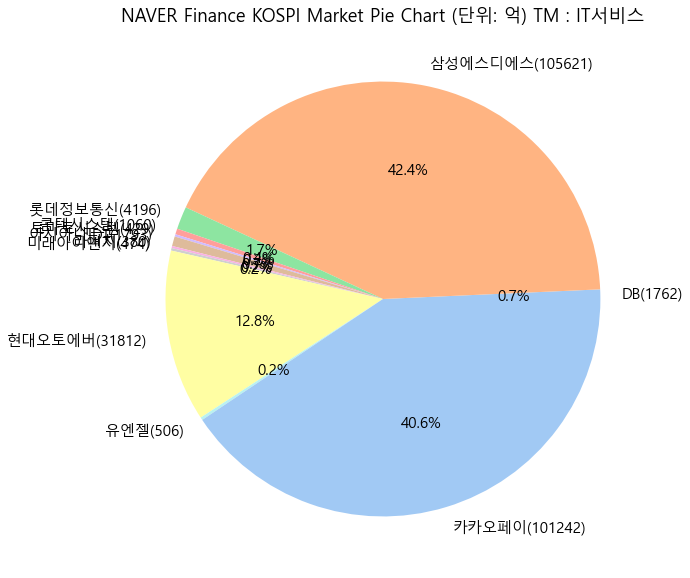

In [85]:
Market_pie(267,info)